In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-sign-dataset-classification/labels.csv
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0060.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0073.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0045.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0020.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0012.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0061.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0074.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0034.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0053.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0047.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0023.png
/kaggle/inpu

### Step 1: Importing Libraries

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report


### Step 2: Load the Labels from CSV

In [3]:
# Define the path to the labels CSV file
labels_csv_path = '/kaggle/input/traffic-sign-dataset-classification/labels.csv'

# Load the labels into a DataFrame
labels_df = pd.read_csv(labels_csv_path)
labels_df.head()


,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


### Step 3: Load and Preprocess Images

In [4]:
# Define the root directory where images are located
image_root_dir = '/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/'

# Initialize empty lists to store images and labels
images = []
labels = []

# Loop through subdirectories (class labels)
for class_label in range(len(labels_df)):
    class_dir = os.path.join(image_root_dir, str(class_label))
    
    # Loop through images in the class directory
    for image_filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_filename)
        
        # Load and preprocess the image
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))  # Resize to a consistent size
        image = image / 255.0  # Normalize pixel values to [0, 1]
        
        images.append(image)
        labels.append(class_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)


In [5]:
# Display the shapes of the arrays to verify
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (4170, 224, 224, 3)
Labels shape: (4170,)


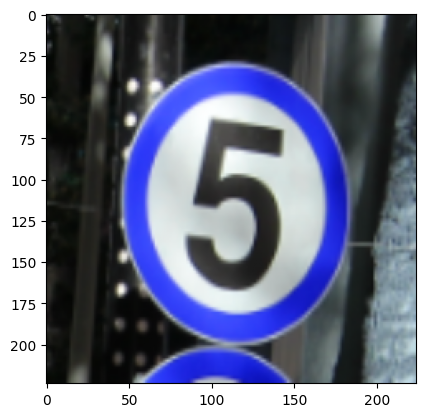

In [6]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

### Step 4: Split Data into Training and Validation Sets

In [7]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


### Step 5: Build the CNN Model

In [8]:
model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(labels_df), activation='softmax')  # Output layer with the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5
    layers.Dense(len(labels_df), activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 173056)           

### Step 6: Train the Model

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
105/105 [==============================] - 532s 5s/step - loss: 3.3304 - accuracy: 0.2041 - val_loss: 2.0235 - val_accuracy: 0.4976
Epoch 2/10
105/105 [==============================] - 531s 5s/step - loss: 2.0571 - accuracy: 0.4529 - val_loss: 1.3503 - val_accuracy: 0.6739
Epoch 3/10
105/105 [==============================] - 547s 5s/step - loss: 1.6461 - accuracy: 0.5393 - val_loss: 1.0747 - val_accuracy: 0.7314
Epoch 4/10
105/105 [==============================] - 539s 5s/step - loss: 1.3257 - accuracy: 0.6037 - val_loss: 0.7348 - val_accuracy: 0.7794
Epoch 5/10
105/105 [==============================] - 537s 5s/step - loss: 1.0824 - accuracy: 0.6670 - val_loss: 0.5680 - val_accuracy: 0.8429
Epoch 6/10
105/105 [==============================] - 539s 5s/step - loss: 0.9994 - accuracy: 0.6838 - val_loss: 0.4918 - val_accuracy: 0.8657
Epoch 7/10
105/105 [==============================] - 538s 5s/step - loss: 0.8169 - accuracy: 0.7341 - val_loss: 0.3877 - val_accuracy: 0.8837

### Step 7: Evaluate the Model

In [12]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_val, y_pred_classes)
print(f"Accuracy on Validation Set: {accuracy*100:.2f}%")


27/27 [==============================] - 32s 1s/step - loss: 0.2948 - accuracy: 0.9293
Validation Accuracy: 92.93%
27/27 [==============================] - 33s 1s/step
Accuracy on Validation Set: 92.93%


### Step 8: Plotting Loss and Accuracy Curves

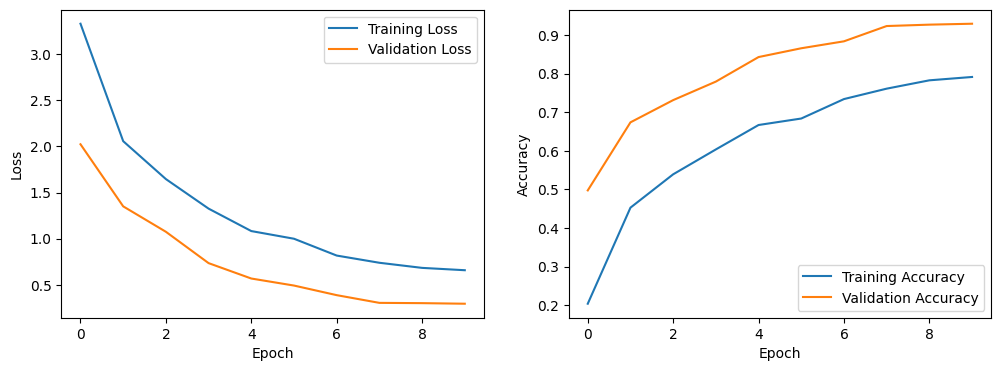

In [13]:
# Extract loss and accuracy from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Step 9. Calculating and Printing Precision, Recall, and F1-score 

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'y_val' contains the true labels and 'y_pred_classes' contains the predicted classes
precision = precision_score(y_val, y_pred_classes, average='weighted')
recall = recall_score(y_val, y_pred_classes, average='weighted')
f1 = f1_score(y_val, y_pred_classes, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 0.93
Recall: 0.93
F1-score: 0.92


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Step 10: Evaluating the Model on Test Data

In [14]:
# Define the path to the test data directory
test_data_dir = '/kaggle/input/traffic-sign-dataset-classification/traffic_Data/TEST/'

# Initialize empty list to store test images
test_images = []

# Loop through images in the test data directory
for image_filename in os.listdir(test_data_dir):
    image_path = os.path.join(test_data_dir, image_filename)
    
    # Load and preprocess the test image
    test_image = cv2.imread(image_path)
    test_image = cv2.resize(test_image, (224, 224))  # Resize to a consistent size
    test_image = test_image / 255.0  # Normalize pixel values to [0, 1]
    
    test_images.append(test_image)

# Convert the test images list to a NumPy array
test_images = np.array(test_images)
